In [1]:
using LinearAlgebra
using TrajectoryOptimization
using Plots

┌ Info: Precompiling TrajectoryOptimization [c79d492b-0548-5874-b488-5a62c1d9d0ca]
└ @ Base loading.jl:1273
┌ Warning: Package TrajectoryOptimization does not have DifferentialEquations in its dependencies:
│ - If you have TrajectoryOptimization checked out for development and have
│   added DifferentialEquations as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with TrajectoryOptimization
└ Loading DifferentialEquations into TrajectoryOptimization from project dependency, future warnings for TrajectoryOptimization are suppressed.


In [2]:
#Pauli spin matrices
i2 = [0 -1; 1 0] #2x2 unit imaginary matrix
Sx = [zeros(2,2) I; I zeros(2,2)]
Sy = [zeros(2,2) -i2; i2 zeros(2,2)]
Sz = [I zeros(2,2); zeros(2,2) -I]
iSx = [zeros(2,2) i2; i2 zeros(2,2)]
iSy = [zeros(2,2) I; -I zeros(2,2)]
iSz = [i2 zeros(2,2); zeros(2,2) -i2];

In [3]:
function qubit_dynamics!(ẋ,x,u)
      ẋ .= (-iSx - u.*iSz)*x
end

qubit_dynamics! (generic function with 1 method)

In [4]:
n = 4 #state dimension
m = 1 #inut dimension
model = Model(qubit_dynamics!,n,m)
model_d = rk4(model);

In [11]:
dt = 0.01 #time step
N = 101 #number of knot points

x0 = [1.0, 0, 0, 0] #initial state
xf = [1/sqrt(2), 0, 1/sqrt(2), 0] #desired final state

u0 = [randn(m) for k = 1:N-1]; #random initial guess for control inputs

#Set up quadratic objective function
Q = 1.0*Diagonal(I,n)
R = 0.1*Diagonal(I,m)
Qf = 100.0*Diagonal(I,n)
obj = LQRObjective(Q,R,Qf,xf,N);

In [12]:
#Set up and solve traj. opt. problem
prob = Problem(model_d, obj, x0=x0, xf=xf, N=N, dt=dt)
initial_controls!(prob, u0) #random guess for initial controls
solver = solve!(prob, iLQRSolverOptions{Float64}(square_root=true, verbose=true));

    iter cost          expected    z         α         dJ        grad      zero_count ρ         info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    2     7.0087718119  25.2132427  2.060473  1         51.95119  4.833639 0           0e+00    
    3     1.2088678849  5.95878265  0.973337  1         5.799904  3.014442 0           0e+00    
    4     0.7474709555  0.47359801  0.974237  1         0.461397  1.092733 0           0e+00    
    5     0.7261774719  0.02121535  1.003683  1         0.021293  0.246245 0           0e+00    
    6     0.7261471991  0.0000291   1.040324  1         3.03e-05  0.008919 0           0e+00    


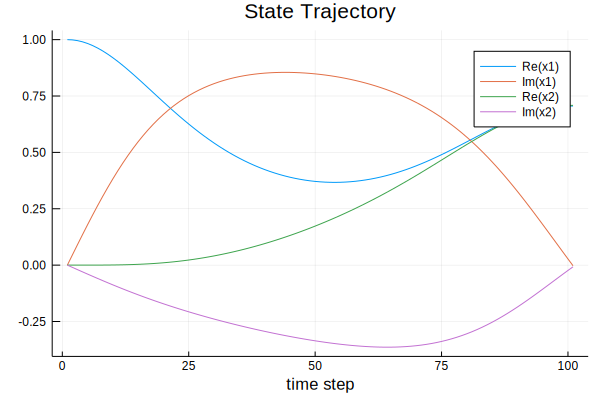

In [13]:
plot(prob.X,xlabel="time step",title="State Trajectory",label=["Re(x1)" "Im(x1)" "Re(x2)" "Im(x2)"])

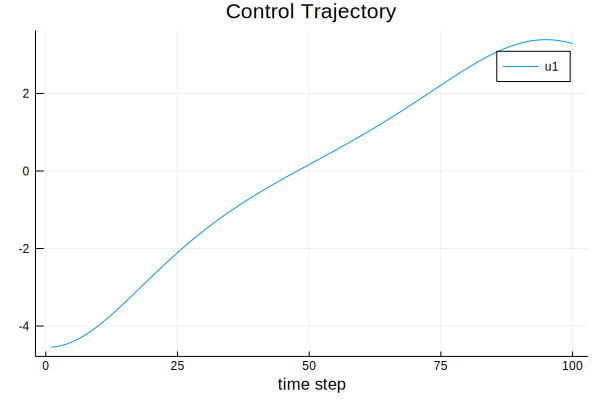

In [14]:
plot(prob.U,xlabel="time step",title="Control Trajectory",label="u1")